In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolz import compose
from numpy.linalg import norm
from sklearn.cluster import KMeans
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('..')

import modules.plotting as pl
import modules.signals as sig
import modules.numpy_funcs as nf
import modules.pandas_funcs as pf
import modules.gait_metrics as gm
import modules.assign_sides as asi
import modules.sliding_window as sw
import modules.iterable_funcs as itf
import modules.linear_algebra as lin
import modules.phase_detection as pde

In [2]:
file_name = '2014-12-08_P004_Post_004'

In [3]:
best_pos_dir = os.path.join('..', 'data', 'kinect', 'best pos')
hypo_dir = os.path.join('..', 'data', 'kinect', 'processed', 'hypothesis')

hypo_paths = glob.glob(os.path.join(hypo_dir, '*.pkl'))
best_pos_paths = glob.glob(os.path.join(best_pos_dir, '*.pkl'))

hypo_paths = [x for x in hypo_paths if file_name in x]
best_pos_paths = [x for x in best_pos_paths if file_name in x]

df_hypo = pd.read_pickle(hypo_paths[0])
df_best_pos = pd.read_pickle(best_pos_paths[0])

In [4]:
# Convert all position vectors to float type
# so they can be easily input to linear algebra functions
df_best_pos = df_best_pos.applymap(pd.to_numeric)

# Cluster frames with k means to locate the 4 walking passes
frames = df_best_pos.index.values.reshape(-1, 1)
k_means = KMeans(n_clusters=4, random_state=0).fit(frames)

# Sort labels so that the frames are in temporal order
labels = itf.map_sort(k_means.labels_)

# DataFrames for each walking pass in a trial
pass_dfs = nf.group_by_label(df_best_pos, labels)

In [5]:
df_pass = list(pass_dfs)[0]

In [7]:
foot_dist = (df_pass.L_FOOT - df_pass.R_FOOT).apply(norm)

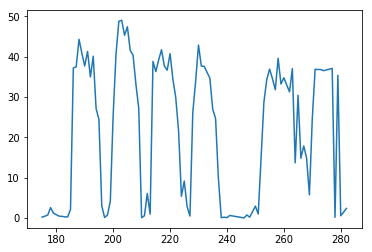

In [8]:
plt.plot(foot_dist)